In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
# Load the dataset
data = pd.read_csv("breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Preprocessing
# Mapping 'M' to 1 (Malignant) and 'B' to 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Dropping the 'id' column since it's not needed
data = data.drop(columns=['id'])

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target (diagnosis)


In [17]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Dictionary to store model results
models = {
    'KNN': knn,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Logistic Regression': log_reg
}


In [21]:
# Store accuracies for visualization
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Print evaluation metrics
    print(f"--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Store accuracy for comparison
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"Accuracy: {accuracy}\n")


--- KNN ---
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315

--- Random Forest ---
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544

--- Decision Tree ---
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score 

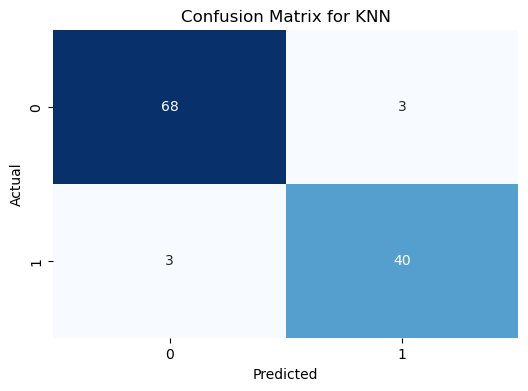

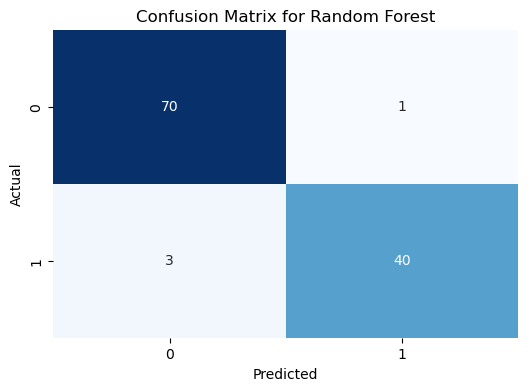

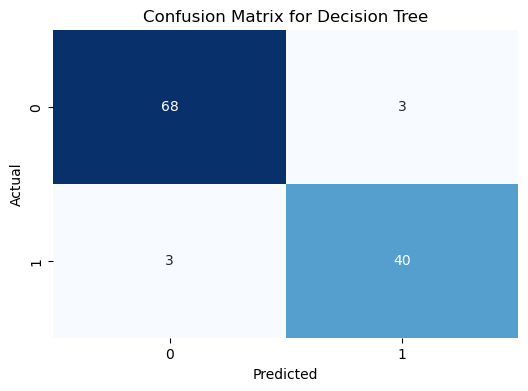

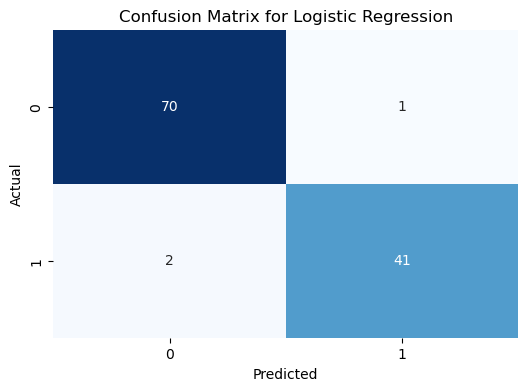

In [23]:
# Visualize the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


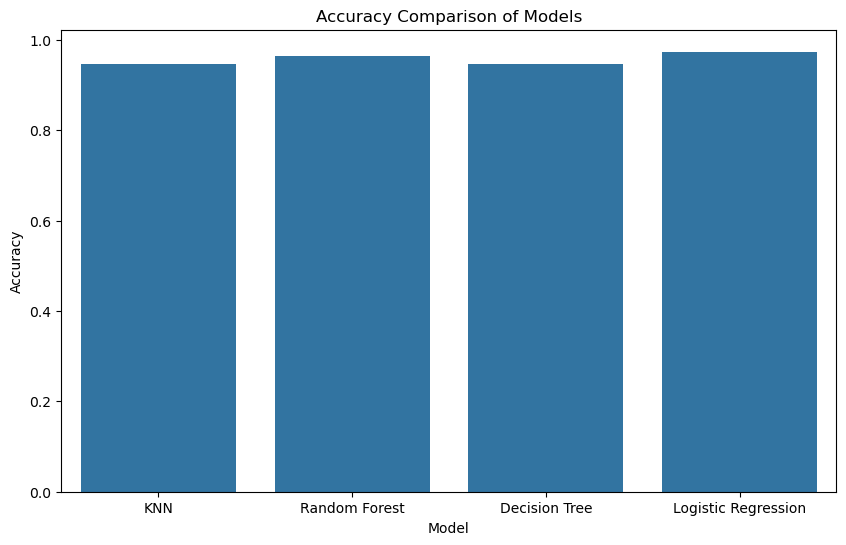

In [25]:
# Plot accuracies of all models
plt.figure(figsize=(10,6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title("Accuracy Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


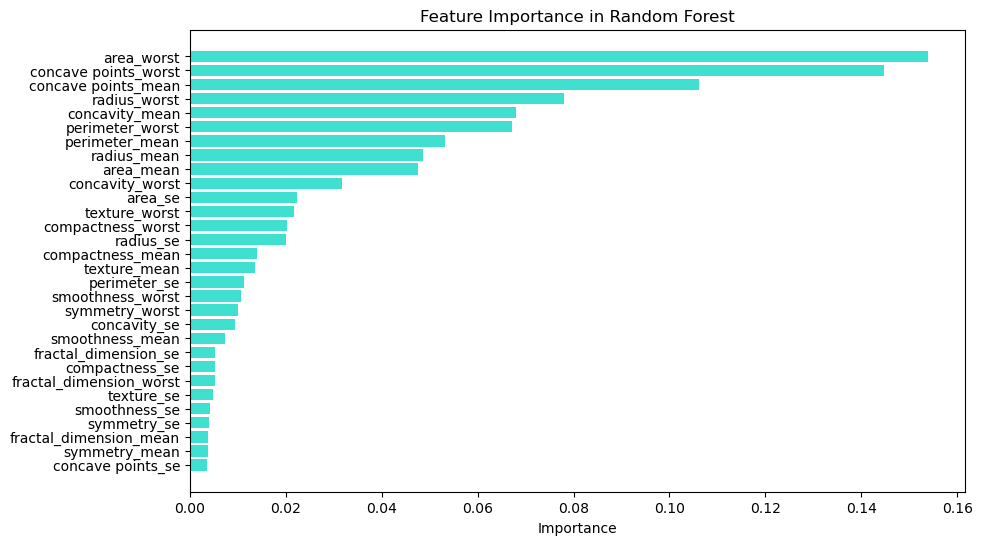

In [27]:
# Feature importance for Random Forest
if 'Random Forest' in models:
    feature_importances = rf.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    plt.figure(figsize=(10,6))
    plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='turquoise')
    plt.title('Feature Importance in Random Forest')
    plt.xlabel('Importance')
    plt.show()
